In [18]:
# !pip install keras
# !pip install tensorflow
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer, InputSpec
from keras import backend as K
from keras.models import load_model
K.set_image_data_format('channels_first')

import pickle
import cv2
import os.path
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from utils_and_webcam.utility import *
from utils_and_webcam.webcam_utility import *

In [19]:
# triplet loss function
#  y_pred - list containing three objects:
#         anchor(None, 128) -- encodings for the anchor images
#         positive(None, 128) -- encodings for the positive images
#         negative(None, 128) -- encodings for the negative images
def triplet_loss(y_true, y_pred, alpha = 0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    print("This is a custom loss function")
    print("y_list:",y_pred)
    
    # triplet formula components
    pos_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[1])) )
    neg_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[2])) )
    basic_loss = pos_dist - neg_dist + alpha
    
    loss = tf.maximum(basic_loss, 0.0)
   
    return loss

In [3]:
# load the model
FRmodel = load_model('models/facenet_keras.h5', custom_objects={'triplet_loss': triplet_loss})
FRmodel.compile(loss=triplet_loss)

In [20]:
# initialize the user database
def ini_user_database():
    # check for existing database
    if os.path.exists('database/user_dict.pickle'):
        with open('database/user_dict.pickle', 'rb') as handle:
            user_db = pickle.load(handle)   
    else:
        # make a new one
        # we use a dict for keeping track of mapping of each person with his/her face encoding
        user_db = {}
        # create the directory for saving the db pickle file
        os.makedirs('database')
        with open('database/user_dict.pickle', 'wb') as handle:
            pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)   
    return user_db

In [21]:
# adds a new user face to the database using his/her image stored on disk using the image path
def add_user_img_path(user_db, FRmodel, name, img_path):
    if name not in user_db: 
        user_db[name] = img_to_encoding(img_path, FRmodel)
        print("Encodings:",user_db[name])
        # save the database
        with open('database/user_dict.pickle', 'wb') as handle:
                pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('User ' + name + ' added successfully')
    else:
        print('The name is already registered! Try a different name.........')

In [22]:
# adds a new user using image taken from webcam
def add_user_webcam(user_db, FRmodel, name):
    # we can use the webcam to capture the user image then get it recognized
    face_found = detect_face(user_db, FRmodel)

    if face_found:
        img_loc="saved_image/UserGenerated.jpg"
        resize_img(img_loc,(96,96))
        
        if name not in user_db: 
            add_user_img_path(user_db, FRmodel, name, "saved_image/UserGenerated.jpg")
        else:
            print('The name is already registered! Try a different name.........')
    else:
        print('There was no face found in the visible frame. Try again...........')

In [9]:
# deletes a registered user from database
def delete_user(user_db, name):
    popped = user_db.pop(name, None)
    
    if popped is not None:
        print('User ' + name + ' deleted successfully')
        # save the database
        with open('database/user_dict.pickle', 'wb') as handle:
                pickle.dump(user_db, handle, protocol=pickle.HIGHEST_PROTOCOL)
    elif popped == None:
        print('No such user !!')

In [23]:
# we use a dict for keeping track of mapping of each person with his/her face encoding
user_db = ini_user_database()

# Adding users from local storage

In [11]:
# add a user
add_user_img_path(user_db, FRmodel, "Abdul Waheed", "images/train_imgs/Abdul Waheed.jpeg")
add_user_img_path(user_db, FRmodel, "Yamin Jani", "images/train_imgs/Yamin.jpeg")
add_user_img_path(user_db, FRmodel, "Akhlaq", "images/train_imgs/Akhlaq.jpeg")
add_user_img_path(user_db, FRmodel, "Syed Irfan", "images/train_imgs/Syed Irfan.jpeg")
add_user_img_path(user_db, FRmodel, "Sanaullah", "images/train_imgs/Sanaullah.jpeg")
add_user_img_path(user_db, FRmodel, "Raheel", "images/train_imgs/Raheel.jpeg")
add_user_img_path(user_db, FRmodel, "Tanveer", "images/train_imgs/Tanveer.jpeg")
add_user_img_path(user_db, FRmodel, "Hameed", "images/train_imgs/Hameed.jpeg")
add_user_img_path(user_db, FRmodel, "Junaid", "images/train_imgs/Junaid.jpeg")
add_user_img_path(user_db, FRmodel, "Kamil", "images/train_imgs/Kamil.jpeg")

The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........
The name is already registered! Try a different name.........


# Adding user through webcam

In [23]:
add_user_webcam(user_db, FRmodel, "Shah Muhammad")

original: (160, 160, 3)
Encodings: [[ 0.1336715   0.6608983   0.81272554 -0.07083142  1.5225155   0.95179296
   1.9360753  -1.5985552  -0.35457265 -1.7873784   0.08184982 -1.5245374
   0.0079644   0.28117508 -0.61035514 -1.7431278   0.6999959  -1.4161031
  -0.44749814 -1.8741691   0.89021325 -2.662983    0.19865963  1.1943927
   0.5814455   2.047803    0.34848103  0.09215089 -1.0435448  -1.9367793
  -0.40244445  1.9226993  -2.612396    1.2529199   0.3231643  -0.10228837
   1.7970169  -0.07007854  1.3410084   0.942544    1.5091983   0.1788192
   1.013091   -0.29582018 -0.9023496   1.141838    1.5115786   0.9137231
   0.95075816 -1.9679772   1.198048    1.2712697   0.34585515 -0.68317294
   0.4998817   2.2923648   1.0930983  -1.7250817   2.1474724   0.80422586
  -0.7828335  -0.35387665  0.21271527  0.35486773 -1.0347325   1.2337395
   0.84662724 -0.01260244  1.0570997   1.035689    0.4977135   0.5269209
   0.20384169  0.75175416 -1.8663845   0.8994524  -0.71348333  0.64914054
  -2.629082

# Deleting a specific user from database

In [22]:
delete_user(user_db, "Shah Muhammad")

User Shah Muhammad deleted successfully


In [24]:
# recognize the input user face encoding by checking for it in the database
def find_face(image_path, database, model, threshold = 0.6):
    # find the face encodings for the input image
    encoding = img_to_encoding(image_path, model)
    
    min_dist = 99999
    # loop over all the recorded encodings in database 
    for name in database:
        # find the similarity between the input encodings and claimed person's encodings using L2 norm
        dist = np.linalg.norm(np.subtract(database[name], encoding) )
        # check if minimum distance or not
        if dist < min_dist:
            min_dist = dist
            identity = name

    #The distance is actually from 0-100, we are providing the threshold, means if the provide threshold = 10, means it 
    #must have at least 90% of accuracy and then if the distance is greater than 10 means accuracy is less than 90% which is
    #not acceptable, so do not recognize it otherwise recognize it
    if min_dist > threshold: 
        print("Distance = ", min_dist)
        print("User not in the database.")
        identity = 'Unknown Person'
    else:
        print ("Hi! " + str(identity) + ", L2 distance: " + str(min_dist) , ", Threshold: "+ str(threshold), ", Test Accuracy: "+ str((100-min_dist)))
        
    return min_dist, identity

In [25]:
# takes an input image from webcam and performs face recognition on it
def do_face_recognition_webcam(user_db, FRmodel, threshold = 0.7):
    # we can use the webcam to capture the user image then get it recognized
    face_found = detect_face(user_db, FRmodel)

    if face_found:
        # img_loc= location where the temporary webcam images are saved
        # resize the image for the model
        img_loc="saved_image/UserGenerated.jpg"
        resize_img(img_loc,(96,96))
        find_face(img_loc, user_db, FRmodel, threshold)
    else:
        print('There was no face found in the visible frame. Try again...........')

In [26]:
def do_face_recognition_from_image(user_db, FRmodel, threshold = 0.7, img_loc = "saved_image/UserGenerated.jpg"):
    # resize the image
    img = cv2.imread(img_loc, 1)
    img = cv2.resize(img, (96, 96))
    # save the temporary image
    cv2.imwrite("saved_image/UserGenerated.jpg", img)

    find_face("saved_image/UserGenerated.jpg", user_db, FRmodel, threshold)

# Testing model on Webcam

In [26]:
# Using webcam
# do_face_recognition_webcam(user_db, FRmodel, 0.7)
do_face_recognition_webcam(user_db, FRmodel, 10)

original: (160, 160, 3)
Hi! Shah Muhammad, L2 distance: 2.9715548 , Threshold: 10 , Test Accuracy: 97.02844524383545


# Testing the model on images

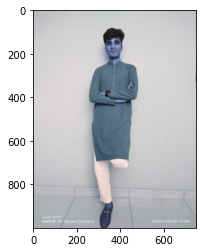

original: (96, 96, 3)
Hi! Kamil, L2 distance: 5.71635 , Threshold: 10 , Test Accuracy: 94.28364992141724


In [18]:
import matplotlib.pyplot as plt
img_location = "images/test_imgs/Kamil-Test.jpeg"
plt.imshow(cv2.imread(img_location))
plt.show()
do_face_recognition_from_image(user_db, FRmodel, threshold = 10, img_loc = img_location)

# Thank you

In [27]:
detect_face_realtime(user_db, FRmodel, 10)

**************** Enter "q" to quit **********************
original: (160, 160, 3)
Welcome Shah Muhammad!
distance:3.011325
original: (160, 160, 3)
Welcome Shah Muhammad!
distance:3.399875
original: (160, 160, 3)
Welcome Shah Muhammad!
distance:3.2003798
